In [1]:
import numpy as np
import importlib.resources
from scipy.interpolate import (interp1d, interp2d, CubicSpline)
from scipy.optimize import minimize
fN = 0.297
mN = 0.946
mh = 125.00
GeVm2tocm2 = 0.3894*1e-3*1e-24
Gamma_H_SM = 3.2*1e-3 # GeV (3.2^+2.4_-1.7 MeV)
v = 246.0
mass_vector_micro = np.array([2.00000000e+00, 2.09622627e+00, 2.19708228e+00, 2.30279080e+00,
          2.41358528e+00, 2.52971043e+00, 2.65142273e+00, 2.77899099e+00,
          2.91269696e+00, 3.05283593e+00, 3.19971744e+00, 3.35366587e+00,
          3.51502125e+00, 3.68413994e+00, 3.86139546e+00, 4.04717930e+00,
          4.24190178e+00, 4.44599297e+00, 4.65990362e+00, 4.88410619e+00,
          5.11909585e+00, 5.36539159e+00, 5.62353740e+00, 5.89410341e+00,
          6.17768719e+00, 6.47491509e+00, 6.78644354e+00, 7.11296061e+00,
          7.45518744e+00, 7.81387987e+00, 8.18983012e+00, 8.58386852e+00,
          8.99686534e+00, 9.42973273e+00, 9.88342672e+00, 1.03589494e+01,
          1.08573509e+01, 1.13797321e+01, 1.19272466e+01, 1.25011038e+01,
          1.31025711e+01, 1.37329769e+01, 1.43937135e+01, 1.50862401e+01,
          1.58120864e+01, 1.65728555e+01, 1.73702275e+01, 1.82059636e+01,
          1.90819095e+01, 2.00000000e+01, 2.04706204e+01, 2.09523151e+01,
          2.14453444e+01, 2.19499753e+01, 2.24664807e+01, 2.29951399e+01,
          2.35362390e+01, 2.40900708e+01, 2.46569348e+01, 2.52371377e+01,
          2.58309933e+01, 2.64388230e+01, 2.70609555e+01, 2.76977274e+01,
          2.83494833e+01, 2.90165756e+01, 2.96993652e+01, 3.03982217e+01,
          3.11135229e+01, 3.18456559e+01, 3.25950167e+01, 3.33620107e+01,
          3.41470530e+01, 3.49505680e+01, 3.57729906e+01, 3.66147656e+01,
          3.74763485e+01, 3.83582052e+01, 3.92608130e+01, 4.01846600e+01,
          4.11302462e+01, 4.20980829e+01, 4.30886938e+01, 4.41026148e+01,
          4.51403944e+01, 4.62025940e+01, 4.72897883e+01, 4.84025653e+01,
          4.95415271e+01, 5.07072899e+01, 5.19004842e+01, 5.31217557e+01,
          5.43700000e+01, 5.56500000e+01, 5.69600000e+01, 5.83000000e+01,
          6.00000000e+01, 6.10000000e+01, 6.15000000e+01, 6.18000000e+01,
          6.20000000e+01, 6.22000000e+01, 6.23000000e+01, 6.23500000e+01,
          6.24000000e+01, 6.24300000e+01, 6.24500000e+01, 6.24600000e+01,
          6.24700000e+01, 6.24750000e+01, 6.24800000e+01, 6.24850000e+01,
          6.24900000e+01, 6.24930000e+01, 6.24950000e+01, 6.24970000e+01,
          6.24980000e+01, 6.24990000e+01, 6.25000000e+01, 6.25010000e+01,
          6.25020000e+01, 6.25030000e+01, 6.25050000e+01, 6.25070000e+01,
          6.25100000e+01, 6.25150000e+01, 6.25200000e+01, 6.25250000e+01,
          6.25300000e+01, 6.25400000e+01, 6.25500000e+01, 6.25700000e+01,
          6.26000000e+01, 6.26500000e+01, 6.27000000e+01, 6.28000000e+01,
          6.30000000e+01, 6.32000000e+01, 6.36000000e+01, 6.42000000e+01,
          6.55000000e+01, 6.70300000e+01, 6.86100000e+01, 7.02200000e+01,
          7.18800000e+01, 7.35675954e+01, 7.52987161e+01, 7.70705719e+01,
          7.88841212e+01, 8.07403452e+01, 8.26402480e+01, 8.45848575e+01,
          8.65752256e+01, 8.86124291e+01, 9.06975702e+01, 9.28317767e+01,
          9.50162032e+01, 9.72520316e+01, 9.95404713e+01, 1.01882760e+02,
          1.04280166e+02, 1.06733985e+02, 1.09245544e+02, 1.11816204e+02,
          1.14447353e+02, 1.17140416e+02, 1.19896850e+02, 1.22718145e+02,
          1.25605829e+02, 1.28561462e+02, 1.31586645e+02, 1.34683013e+02,
          1.37852242e+02, 1.41096046e+02, 1.44416180e+02, 1.47814441e+02,
          1.51292666e+02, 1.54852737e+02, 1.58496580e+02, 1.62226166e+02,
          1.66043514e+02, 1.69950687e+02, 1.73949801e+02, 1.78043017e+02,
          1.82232551e+02, 1.86520669e+02, 1.90909691e+02, 1.95401991e+02,
          2.00000000e+02, 2.09622627e+02, 2.19708228e+02, 2.30279080e+02,
          2.41358528e+02, 2.52971043e+02, 2.65142273e+02, 2.77899099e+02,
          2.91269696e+02, 3.05283593e+02, 3.19971744e+02, 3.35366587e+02,
          3.51502125e+02, 3.68413994e+02, 3.86139546e+02, 4.04717930e+02,
          4.24190178e+02, 4.44599297e+02, 4.65990362e+02, 4.88410619e+02,
          5.11909585e+02, 5.36539159e+02, 5.62353740e+02, 5.89410341e+02,
          6.17768719e+02, 6.47491509e+02, 6.78644354e+02, 7.11296061e+02,
          7.45518744e+02, 7.81387987e+02, 8.18983012e+02, 8.58386852e+02,
          8.99686534e+02, 9.42973273e+02, 9.88342672e+02, 1.03589494e+03,
          1.08573509e+03, 1.13797321e+03, 1.19272466e+03, 1.25011039e+03,
          1.31025711e+03, 1.37329769e+03, 1.43937135e+03, 1.50862401e+03,
          1.58120864e+03, 1.65728555e+03, 1.73702275e+03, 1.82059636e+03,
          1.90819095e+03, 2.00000000e+03, 2.09622627e+03, 2.19708228e+03,
          2.30279080e+03, 2.41358528e+03, 2.52971043e+03, 2.65142273e+03,
          2.77899099e+03, 2.91269695e+03, 3.05283593e+03, 3.19971744e+03,
          3.35366587e+03, 3.51502125e+03, 3.68413994e+03, 3.86139546e+03,
          4.04717930e+03, 4.24190178e+03, 4.44599297e+03, 4.65990362e+03,
          4.88410619e+03, 5.11909585e+03, 5.36539159e+03, 5.62353740e+03,
          5.89410341e+03, 6.17768719e+03, 6.47491509e+03, 6.78644354e+03,
          7.11296061e+03, 7.45518744e+03, 7.81387987e+03, 8.18983012e+03,
          8.58386852e+03, 8.99686534e+03, 9.42973273e+03, 9.88342672e+03,
          1.03589494e+04, 1.08573509e+04, 1.13797321e+04, 1.19272466e+04,
          1.25011039e+04, 1.31025711e+04, 1.37329769e+04, 1.43937135e+04,
          1.50862401e+04, 1.58120864e+04, 1.65728555e+04, 1.73702275e+04,
          1.82059636e+04, 1.90819095e+04, 2.00000000e+04])
''' vector of masses used for the evaluation of the relic density with MICROMEGAs  '''

mass_vector_drake = np.array([36.6147656, 37.4763485, 38.3582052, 39.260813, 40.18466, 41.1302462, 
    42.0980829, 43.0886938, 44.1026148, 45.1403944, 46.202594, 
    47.2897883, 48.4025653, 49.5415271, 50.7072899, 51.9004842, 
    53.1217557, 54.37, 55.65, 56.96, 57.63, 58.3, 59.15, 60., 60.5, 61., 61.25, 61.5, 61.65, 61.8, 62., 
    62.2, 62.3, 62.35, 62.4, 62.43, 62.45, 62.46, 62.47, 62.475, 62.48, 
    62.485, 62.49, 62.493, 62.495, 62.497, 62.498, 62.499, 62.5, 62.501, 
    62.502, 62.503, 62.505, 62.507, 62.51, 62.515, 62.52, 62.525, 62.53, 
    62.54, 62.55, 62.57, 62.6, 62.65, 62.7, 62.8, 63., 63.2, 63.6, 64.2, 
    65.5, 67.03, 68.61, 70.22, 71.88, 73.5675954, 75.2987161, 77.0705719, 
    78.8841212, 80.7403452, 82.640248, 84.5848575, 86.5752256, 
    88.6124291, 90.6975702])


massz_vec = np.array([2.00000000e+00, 2.09622627e+00, 2.19708228e+00, 2.30279080e+00,
          2.41358528e+00, 2.52971043e+00, 2.65142273e+00, 2.77899099e+00,
          2.91269696e+00, 3.05283593e+00, 3.19971744e+00, 3.35366587e+00,
          3.51502125e+00, 3.68413994e+00, 3.86139546e+00, 4.04717930e+00,
          4.24190178e+00, 4.44599297e+00, 4.65990362e+00, 4.88410619e+00,
          5.11909585e+00, 5.36539159e+00, 5.62353740e+00, 5.89410341e+00,
          6.17768719e+00, 6.47491509e+00, 6.78644354e+00, 7.11296061e+00,
          7.45518744e+00, 7.81387987e+00, 8.18983012e+00, 8.58386852e+00,
          8.99686534e+00, 9.42973273e+00, 9.88342672e+00, 1.03589494e+01,
          1.08573509e+01, 1.13797321e+01, 1.19272466e+01, 1.25011038e+01,
          1.31025711e+01, 1.37329769e+01, 1.43937135e+01, 1.50862401e+01,
          1.58120864e+01, 1.65728555e+01, 1.73702275e+01, 1.82059636e+01,
          1.90819095e+01, 2.00000000e+01, 2.04706204e+01, 2.09523151e+01,
          2.14453444e+01, 2.19499753e+01, 2.24664807e+01, 2.29951399e+01,
          2.35362390e+01, 2.40900708e+01, 2.46569348e+01, 2.52371377e+01,
          2.58309933e+01, 2.64388230e+01, 2.70609555e+01, 2.76977274e+01,
          2.83494833e+01, 2.90165756e+01, 2.96993652e+01, 3.03982217e+01,
          3.11135229e+01, 3.18456559e+01, 3.25950167e+01, 3.33620107e+01,
          3.41470530e+01, 3.49505680e+01, 3.57729906e+01, 3.66147656e+01,
          3.74763485e+01, 3.83582052e+01, 3.92608130e+01, 4.01846600e+01,
          4.11302462e+01, 4.20980829e+01, 4.30886938e+01, 4.41026148e+01,
          4.51403944e+01, 4.62025940e+01, 4.72897883e+01, 4.84025653e+01,
          4.95415271e+01, 5.07072899e+01, 5.19004842e+01, 5.31217557e+01,
          5.43700000e+01, 5.56500000e+01, 5.69600000e+01, 5.83000000e+01,
          6.00000000e+01, 6.10000000e+01, 6.15000000e+01, 6.18000000e+01,
          6.20000000e+01, 6.22000000e+01, 6.23000000e+01, 6.23500000e+01,
          6.24000000e+01, 6.24300000e+01, 6.24500000e+01, 6.24600000e+01,
          6.24700000e+01, 6.24750000e+01, 6.24800000e+01, 6.24850000e+01,
          6.24900000e+01, 6.24930000e+01, 6.24950000e+01, 6.24970000e+01,
          6.24980000e+01, 6.24990000e+01, 6.25000000e+01, 6.25010000e+01,
          6.25020000e+01, 6.25030000e+01, 6.25050000e+01, 6.25070000e+01,
          6.25100000e+01, 6.25150000e+01, 6.25200000e+01, 6.25250000e+01,
          6.25300000e+01, 6.25400000e+01, 6.25500000e+01, 6.25700000e+01,
          6.26000000e+01, 6.26500000e+01, 6.27000000e+01, 6.28000000e+01,
          6.30000000e+01, 6.32000000e+01, 6.36000000e+01, 6.42000000e+01,
          6.55000000e+01, 6.70300000e+01, 6.86100000e+01, 7.02200000e+01,
          7.18800000e+01, 7.35675954e+01, 7.52987161e+01, 7.70705719e+01,
          7.88841212e+01, 8.07403452e+01, 8.26402480e+01, 8.45848575e+01,
          8.65752256e+01, 8.86124291e+01, 9.06975702e+01, 9.28317767e+01,
          9.50162032e+01, 9.72520316e+01, 9.95404713e+01, 1.01882760e+02,
          1.04280166e+02, 1.06733985e+02, 1.09245544e+02, 1.11816204e+02,
          1.14447353e+02, 1.17140416e+02, 1.19896850e+02, 1.22718145e+02,
          1.25605829e+02, 1.28561462e+02, 1.31586645e+02, 1.34683013e+02,
          1.37852242e+02, 1.41096046e+02, 1.44416180e+02, 1.47814441e+02,
          1.51292666e+02, 1.54852737e+02, 1.58496580e+02, 1.62226166e+02,
          1.66043514e+02, 1.69950687e+02, 1.73949801e+02, 1.78043017e+02,
          1.82232551e+02, 1.86520669e+02, 1.90909691e+02, 1.95401991e+02,
          2.00000000e+02, 2.09622627e+02, 2.19708228e+02, 2.30279080e+02,
          2.41358528e+02, 2.52971043e+02, 2.65142273e+02, 2.77899099e+02,
          2.91269696e+02, 3.05283593e+02, 3.19971744e+02, 3.35366587e+02,
          3.51502125e+02, 3.68413994e+02, 3.86139546e+02, 4.04717930e+02,
          4.24190178e+02, 4.44599297e+02, 4.65990362e+02, 4.88410619e+02,
          5.11909585e+02, 5.36539159e+02, 5.62353740e+02, 5.89410341e+02,
          6.17768719e+02, 6.47491509e+02, 6.78644354e+02, 7.11296061e+02,
          7.45518744e+02, 7.81387987e+02, 8.18983012e+02, 8.58386852e+02,
          8.99686534e+02, 9.42973273e+02, 9.88342672e+02, 1.03589494e+03,
          1.08573509e+03, 1.13797321e+03, 1.19272466e+03, 1.25011039e+03,
          1.31025711e+03, 1.37329769e+03, 1.43937135e+03, 1.50862401e+03,
          1.58120864e+03, 1.65728555e+03, 1.73702275e+03, 1.82059636e+03,
          1.90819095e+03, 2.00000000e+03, 2.09622627e+03, 2.19708228e+03,
          2.30279080e+03, 2.41358528e+03, 2.52971043e+03, 2.65142273e+03,
          2.77899099e+03, 2.91269695e+03, 3.05283593e+03, 3.19971744e+03,
          3.35366587e+03, 3.51502125e+03, 3.68413994e+03, 3.86139546e+03,
          4.04717930e+03, 4.24190178e+03, 4.44599297e+03, 4.65990362e+03,
          4.88410619e+03, 5.11909585e+03, 5.36539159e+03, 5.62353740e+03,
          5.89410341e+03, 6.17768719e+03, 6.47491509e+03, 6.78644354e+03,
          7.11296061e+03, 7.45518744e+03, 7.81387987e+03, 8.18983012e+03,
          8.58386852e+03, 8.99686534e+03, 9.42973273e+03, 9.88342672e+03,
          1.03589494e+04, 1.08573509e+04, 1.13797321e+04, 1.19272466e+04,
          1.25011039e+04, 1.31025711e+04, 1.37329769e+04, 1.43937135e+04,
          1.50862401e+04, 1.58120864e+04, 1.65728555e+04, 1.73702275e+04,
          1.82059636e+04, 1.90819095e+04])


MassDD_vec = np.array([4.01846600e+01,4.11302462e+01, 4.20980829e+01, 4.30886938e+01, 4.41026148e+01,
         4.51403944e+01, 4.62025940e+01, 4.72897883e+01, 4.84025653e+01,
         4.95415271e+01, 5.07072899e+01, 5.19004842e+01, 5.31217557e+01,
         5.43700000e+01, 5.56500000e+01, 5.69600000e+01, 5.83000000e+01,
         6.00000000e+01, 6.10000000e+01, 6.15000000e+01, 6.18000000e+01,
         6.20000000e+01, 6.22000000e+01, 6.23000000e+01, 6.23500000e+01,
         6.24000000e+01, 6.24300000e+01, 6.24500000e+01, 6.24600000e+01,
         6.24700000e+01, 6.24750000e+01, 6.24800000e+01, 6.24850000e+01,
         6.24900000e+01, 6.24930000e+01, 6.24950000e+01, 6.24970000e+01,
         6.24980000e+01, 6.24990000e+01, 6.25000000e+01, 6.25010000e+01,
         6.25020000e+01, 6.25030000e+01, 6.25050000e+01, 6.25070000e+01,
         6.25100000e+01, 6.25150000e+01, 6.25200000e+01, 6.25250000e+01,
         6.25300000e+01, 6.25400000e+01, 6.25500000e+01, 6.25700000e+01,
         6.26000000e+01, 6.26500000e+01, 6.27000000e+01, 6.28000000e+01,
         6.30000000e+01, 6.32000000e+01, 6.36000000e+01, 6.42000000e+01,
         6.55000000e+01, 6.70300000e+01, 6.86100000e+01, 7.02200000e+01,
         7.18800000e+01, 7.35675954e+01, 7.52987161e+01, 7.70705719e+01,
         7.88841212e+01, 8.07403452e+01])
logenergyx_bins = np.arange(-8.955,-0.000,0.09)
lambda_vec = np.logspace(-2.,1.,13)
lambdahs_vec = np.logspace(-4,1,21)


def import_data_file(file_name):
    with importlib.resources.path('sigmav',file_name) as f:
        path = str(f)
    return path


def returnsigmav(file_name):
    sep = ","
    x = 'Total_xsec                    = ['
    f = open(file_name)
    sigmav_value=0
    for line in f:
      if x in line:
        matches = [l[l.find(x)+len(x):] for l in line.split(sep) if l[l.find(x)+len(x):]]
        sigmav_value = float(matches[0])
    return sigmav_value

In [2]:
def lambda2sigmav(DMmass_val,lambdahs_val,table_int):
    if lambdahs_val < 1e-4:
        func_int = interp1d(massz_vec,table_int[:,1],kind='cubic')
        rescaling_lambda = pow(lambdahs_val/1e-4,2.)
        return float(rescaling_lambda*func_int(DMmass_val))

    elif lambdahs_val > 1e1:
        func_int_1 = interp1d(massz_vec,table_int[:,len(lambdahs_vec)-1])
        func_int_2 = interp1d(massz_vec,table_int[:,len(lambdahs_vec)])
        val1 = func_int_1(DMmass_val)
        val2 = func_int_2(DMmass_val)
        if val1==0:
            val1=1e-50
        if val2==0:
            val2=1e-50
        logres_1 = np.log10(val1)
        logres_2 = np.log10(val2)
        loglambda_1 = np.log10(lambdahs_vec[len(lambdahs_vec)-2])
        loglambda_2  = np.log10(lambdahs_vec[len(lambdahs_vec)-1])
        #rescaling_lambda = pow(lambdahs_val/1e1,2.)
        result = logres_2 + (logres_2-logres_1)*(np.log10(lambdahs_val)-loglambda_2)/(loglambda_2-loglambda_1)
        #print(pow(10.,logres_1),pow(10.,logres_2),pow(10.,loglambda_1),pow(10.,loglambda_2),pow(10.,result))
        return pow(10.,result)

    else:
        func_int = interp2d( massz_vec, lambdahs_vec , np.ndarray.flatten( table_int[:,1:(len(lambdahs_vec)+1)]),kind='cubic')
        return float(func_int( DMmass_val, lambdahs_val) )

In [3]:
def sigmav_channels(DMmass_val,lambdahs_val,channel):
    if channel=='tot':
        table_int = np.loadtxt(('sigmav_tot.dat'))
        sigmav_val = lambda2sigmav(DMmass_val,lambdahs_val,table_int)

    else:
        table_int = np.loadtxt(('sigmav_%s.dat'%channel))
        sigmav_val = lambda2sigmav(DMmass_val,lambdahs_val,table_int)

    return sigmav_val

In [4]:
def interpolate_relicdensity(mass_val,QCDmodel):
    if QCDmodel=='QCDA':
        column = 1
    elif QCDmodel=='QCDB':
        column = 2
    table_RD_FB = np.loadtxt(('MicroOMEGAs_cross.dat'))
    mass_vec = table_RD_FB[:,0]
    lambda_vec = table_RD_FB[:,column]
    func = interp1d(mass_vec,lambda_vec)
    return func(mass_val)

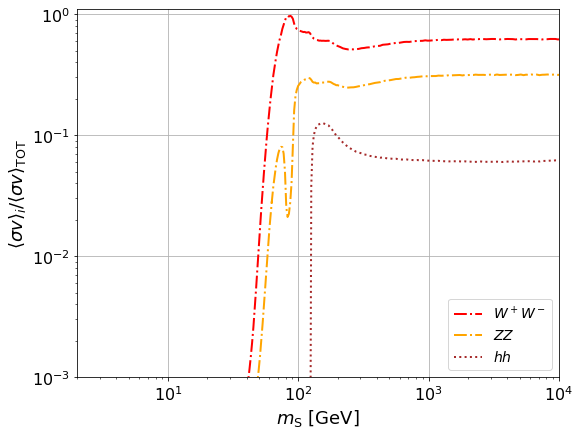

c:\Users\86177\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 28909 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\86177\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\86177\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\86177\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25955 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\86177\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\86177\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25130 missing from c

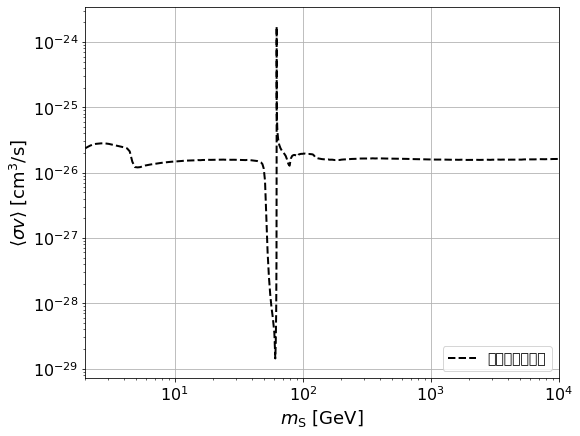

In [5]:
import matplotlib.pyplot as plt
import numpy as np
Br_cc = np.zeros(len(massz_vec))
Br_bb = np.zeros(len(massz_vec))
Br_tt = np.zeros(len(massz_vec))
Br_tautau = np.zeros(len(massz_vec))
Br_gg = np.zeros(len(massz_vec))
Br_ww = np.zeros(len(massz_vec))
Br_zz = np.zeros(len(massz_vec))
Br_hh = np.zeros(len(massz_vec))
Br_aa = np.zeros(len(massz_vec))
Br_za = np.zeros(len(massz_vec))
for t in range(len(massz_vec)):
    total_contribution = sigmav_channels(massz_vec[t],0.001,'tot')
    Br_ww[t] = sigmav_channels(massz_vec[t],0.001,'ww')/total_contribution
    Br_zz[t] = sigmav_channels(massz_vec[t],0.001,'zz')/total_contribution
    Br_hh[t] = sigmav_channels(massz_vec[t],0.001,'hh')/total_contribution
fig = plt.figure(figsize=(8,6))
plt.plot(massz_vec,Br_ww, color='red', ls='-.', lw=2.0, label=r'$W^+W^-$' )
plt.plot(massz_vec,Br_zz, color='orange', ls='-.', lw=2.0, label=r'$ZZ$' )
plt.plot(massz_vec,Br_hh, color='brown', ls=':', lw=2.0, label=r'$hh$' )
plt.ylabel(r'$\langle \sigma v \rangle_i/\langle \sigma v \rangle_{\rm{TOT}}$', fontsize=18)
plt.xlabel(r'$m_{\rm{S}}$ [GeV]', fontsize=18)
plt.axis([2,1e4,1e-3,1.1])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.yscale('log')
plt.xscale('log') 
plt.legend(loc=4,prop={'size':14},numpoints=1, scatterpoints=1, ncol=1)
fig.tight_layout(pad=0.5)
plt.show()
table_int = np.loadtxt(('sigmav_tot.dat'))
sigmav_relic = np.zeros(len(massz_vec))
for t in range(len(massz_vec)):
    lambda_val =  interpolate_relicdensity(massz_vec[t],'QCDB')
    sigmav_relic[t] = lambda2sigmav(massz_vec[t],lambda_val,table_int)
fig = plt.figure(figsize=(8,6))
plt.plot(massz_vec,sigmav_relic, color='black', ls='--', lw=2.0, label=r'热平均散射截面' )
plt.ylabel(r'$\langle \sigma v \rangle$ [cm$^3$/s]', fontsize=18)
plt.xlabel(r'$m_{\rm{S}}$ [GeV]', fontsize=18)
plt.axis([2,1e4,0.5*sigmav_relic.min(),2*sigmav_relic.max()])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.yscale('log')
plt.xscale('log') 
plt.legend(loc=4,prop={'size':14},numpoints=1, scatterpoints=1, ncol=1)
fig.tight_layout(pad=0.5)
plt.show()